1. IMPORT AND INSTALL DEPENDENCIES

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib nltk gtts


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2. KEYPOINTS USING MP HOLISTIC

In [3]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color Conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # make predictions
    image.flags.writeable = True                   # Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color Conversion RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(48,206,117), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(48,164,88), thickness=1, circle_radius=1)
                             )
    #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,220), thickness=2, circle_radius=2)
                             ) 
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,0), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,90,230), thickness=2, circle_radius=2)
                             ) 
#draw right hand connections

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

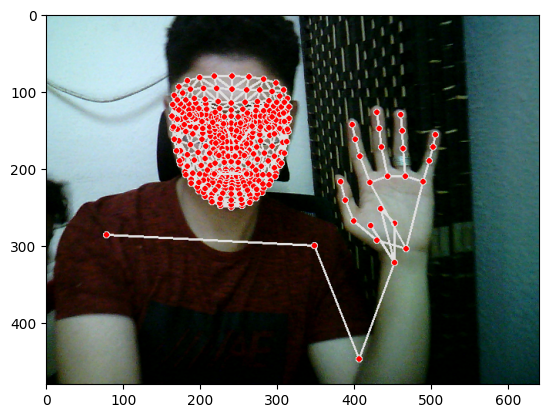

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. IMPORT AND INSTALL DEPENDENCIES

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.38711292,  0.36173603, -0.68769145, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.38711292,  0.36173603, -0.68769145, ...,  0.        ,
        0.        ,  0.        ])

4. SETUP FOLDERS FOR COLLECTION

In [132]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['-', 'hello', 'how are you', 'thank you', 'im fine','nice to meet you','yes', 'no', 'im sorry'])

# 30 videos worth of data
no_sequences = 60

#Videos are going to be 30 frames in length
sequence_length = 30

#Folder start
start_folder = 0

In [133]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING

In [80]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    #New loop
    #loop through actions
    for action in actions:
        #loop through sequences aka vids
        for sequence in range(start_folder, start_folder+no_sequences):
            #loop through vid length aka sequence length
            for frame_num in range(sequence_length):
    
                #Read feed
                ret, frame = cap.read()
                
                #Make detections
                image, results = mediapipe_detection(frame, holistic)
        
                #Draw landmarks
                draw_styled_landmarks(image, results)

                #New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)

                #New Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [142]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    action = "im sorry"  # Manually specify the action
    start_folder = 30  # Manually specify the starting sequence number
    no_sequences = 30  # Manually specify the number of sequences
 
    for sequence in range(start_folder, start_folder+no_sequences):
        for frame_num in range(sequence_length):

            ret, frame = cap.read()

            image, results = mediapipe_detection(frame, holistic)

            draw_styled_landmarks(image, results)

            if frame_num == 0:
                cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(1000)
            else:
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)

            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        
        if sequence == start_folder + no_sequences - 1:  # Check if the last folder has been made
            break

cap.release()
cv2.destroyAllWindows()

In [32]:
cap.release()
cv2.destroyAllWindows()

6. PREPROCESS DATA AND CREATE LABELS AND FEATURES

In [143]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [144]:
label_map = {label:num for num, label in enumerate(actions)}

In [145]:
label_map

{'-': 0,
 'hello': 1,
 'how are you': 2,
 'thank you': 3,
 'im fine': 4,
 'nice to meet you': 5,
 'yes': 6,
 'no': 7,
 'im sorry': 8}

In [146]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [147]:
np.array(sequences).shape

(540, 30, 1662)

In [148]:
np.array(labels).shape

(540,)

In [149]:
X = np.array(sequences)

In [150]:
X.shape

(540, 30, 1662)

In [151]:
y = to_categorical(labels).astype(int)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [153]:
X_test.shape

(270, 30, 1662)

In [154]:
y_test.shape

(270, 9)

7. BUILD AND TRAIN LSTM NEURAL NETWORK

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [266]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [302]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [303]:
actions.shape[0]

9

In [304]:
res = [0.7, 0.2, 0.1]

In [305]:
actions[np.argmax(res)]

'-'

In [306]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [253]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [161]:

# Define the initial learning rate
initial_learning_rate = 0.01

# Define the learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate,  # Initial learning rate
    decay_steps=10000,       # Learning rate decay steps
    decay_rate=0.9           # Learning rate decay rate
)

# Create the optimizer with the learning rate schedule
optimizer = SGD(learning_rate=lr_schedule)

# Compile your model with this optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Now, you can use model.fit with this optimizer
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.05)


Epoch 1/100
8/8 [==============================] - 5s 174ms/step - loss: 2.1915 - categorical_accuracy: 0.2227 - val_loss: 2.1939 - val_categorical_accuracy: 0.1429
Epoch 2/100
8/8 [==============================] - 1s 89ms/step - loss: 2.1817 - categorical_accuracy: 0.2617 - val_loss: 2.1829 - val_categorical_accuracy: 0.1429
Epoch 3/100
8/8 [==============================] - 1s 90ms/step - loss: 2.1735 - categorical_accuracy: 0.2383 - val_loss: 2.1764 - val_categorical_accuracy: 0.2143
Epoch 4/100
8/8 [==============================] - 1s 96ms/step - loss: 2.1644 - categorical_accuracy: 0.2656 - val_loss: 2.1639 - val_categorical_accuracy: 0.1429
Epoch 5/100
8/8 [==============================] - 1s 89ms/step - loss: 2.1500 - categorical_accuracy: 0.2188 - val_loss: 2.1518 - val_categorical_accuracy: 0.2143
Epoch 6/100
8/8 [==============================] - 1s 93ms/step - loss: 2.1326 - categorical_accuracy: 0.2266 - val_loss: 2.1247 - val_categorical_accuracy: 0.1429
Epoch 7/100
8/8

KeyboardInterrupt: 

In [307]:
history = model.fit(X_train, y_train, batch_size=64, epochs=70, validation_split=0.05)

Epoch 1/70
4/4 [==============================] - 41s 487ms/step - loss: 2.2673 - categorical_accuracy: 0.1055 - val_loss: 1.9470 - val_categorical_accuracy: 0.1429
Epoch 2/70
4/4 [==============================] - 0s 116ms/step - loss: 2.8478 - categorical_accuracy: 0.1562 - val_loss: 1.9400 - val_categorical_accuracy: 0.2143
Epoch 3/70
4/4 [==============================] - 1s 133ms/step - loss: 2.3348 - categorical_accuracy: 0.1055 - val_loss: 2.0083 - val_categorical_accuracy: 0.1429
Epoch 4/70
4/4 [==============================] - 1s 131ms/step - loss: 2.2264 - categorical_accuracy: 0.1367 - val_loss: 1.8464 - val_categorical_accuracy: 0.2857
Epoch 5/70
4/4 [==============================] - 1s 152ms/step - loss: 2.1283 - categorical_accuracy: 0.2070 - val_loss: 1.9637 - val_categorical_accuracy: 0.2143
Epoch 6/70
4/4 [==============================] - 0s 126ms/step - loss: 2.0265 - categorical_accuracy: 0.2266 - val_loss: 1.8518 - val_categorical_accuracy: 0.5000
Epoch 7/70
4/4 

KeyboardInterrupt: 

In [70]:
model.fit(X_train, y_train, epochs=50, callbacks=[tb_callback])

Epoch 1/50
10/10 [==============================] - 11s 114ms/step - loss: 3.0711 - categorical_accuracy: 0.0444
Epoch 2/50
10/10 [==============================] - 1s 113ms/step - loss: 3.0734 - categorical_accuracy: 0.0603
Epoch 3/50
10/10 [==============================] - 1s 106ms/step - loss: 3.0698 - categorical_accuracy: 0.0571
Epoch 4/50
10/10 [==============================] - 1s 106ms/step - loss: 3.3668 - categorical_accuracy: 0.0540
Epoch 5/50
10/10 [==============================] - 1s 106ms/step - loss: 3.0004 - categorical_accuracy: 0.0635
Epoch 6/50
10/10 [==============================] - 1s 110ms/step - loss: 2.9188 - categorical_accuracy: 0.0825
Epoch 7/50
10/10 [==============================] - 1s 110ms/step - loss: 2.9389 - categorical_accuracy: 0.0794
Epoch 8/50
10/10 [==============================] - 1s 108ms/step - loss: 2.8191 - categorical_accuracy: 0.1175
Epoch 9/50
10/10 [==============================] - 1s 102ms/step - loss: 2.7148 - categorical_accuracy

In [308]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_25 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_26 (LSTM)              (None, 64)                49408     
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 9)                 297       
                                                                 
Total params: 596873 (2.28 MB)
Trainable params: 59687

8. MAKE PREDICTIONS

In [309]:
res = model.predict(X_test)

9/9 [==============================] - 1s 27ms/step


In [310]:
actions[np.argmax(res[1])]

'im sorry'

In [311]:
actions[np.argmax(y_test[0])]

'-'

9. SAVE WEIGHTS

In [313]:
model.save('action.h5')

In [301]:
model.load_weights('action.h5')

AttributeError: 'str' object has no attribute 'load_weights'

10. EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [288]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [314]:
yhat = model.predict(X_train)

9/9 [==============================] - 0s 26ms/step


In [315]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [316]:
ytrue

[4,
 3,
 7,
 5,
 5,
 4,
 0,
 2,
 7,
 6,
 7,
 8,
 6,
 1,
 7,
 7,
 6,
 1,
 3,
 2,
 0,
 6,
 8,
 7,
 2,
 4,
 1,
 5,
 3,
 6,
 2,
 7,
 4,
 0,
 8,
 0,
 6,
 0,
 7,
 1,
 5,
 1,
 6,
 8,
 6,
 7,
 4,
 2,
 8,
 3,
 8,
 7,
 2,
 3,
 1,
 7,
 1,
 7,
 2,
 4,
 2,
 4,
 8,
 3,
 1,
 4,
 5,
 3,
 7,
 8,
 1,
 4,
 4,
 7,
 8,
 6,
 4,
 3,
 0,
 4,
 5,
 8,
 2,
 5,
 5,
 7,
 0,
 7,
 1,
 0,
 6,
 4,
 4,
 3,
 4,
 5,
 0,
 5,
 4,
 6,
 6,
 6,
 2,
 7,
 7,
 7,
 4,
 8,
 7,
 7,
 4,
 7,
 0,
 8,
 5,
 3,
 2,
 4,
 8,
 6,
 4,
 7,
 1,
 5,
 8,
 3,
 2,
 7,
 1,
 4,
 7,
 7,
 0,
 1,
 6,
 2,
 8,
 1,
 5,
 7,
 0,
 4,
 4,
 0,
 4,
 5,
 5,
 4,
 6,
 7,
 1,
 8,
 0,
 3,
 8,
 1,
 8,
 5,
 8,
 3,
 1,
 6,
 1,
 0,
 0,
 5,
 8,
 4,
 7,
 2,
 5,
 1,
 5,
 7,
 6,
 2,
 8,
 8,
 3,
 1,
 3,
 2,
 2,
 2,
 2,
 6,
 3,
 2,
 8,
 1,
 3,
 5,
 8,
 6,
 0,
 7,
 0,
 6,
 5,
 2,
 2,
 0,
 6,
 5,
 7,
 1,
 1,
 0,
 8,
 3,
 7,
 8,
 5,
 8,
 2,
 7,
 2,
 6,
 1,
 5,
 7,
 0,
 5,
 4,
 3,
 4,
 3,
 1,
 5,
 4,
 3,
 1,
 6,
 0,
 0,
 3,
 6,
 6,
 3,
 1,
 4,
 3,
 6,
 8,
 5,
 1,
 0,
 4,
 2,
 2,


In [317]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[242,   0],
        [  0,  28]],

       [[236,   4],
        [  5,  25]],

       [[241,   2],
        [ 12,  15]],

       [[244,   2],
        [  3,  21]],

       [[230,   7],
        [ 15,  18]],

       [[234,   7],
        [  3,  26]],

       [[233,   5],
        [ 20,  12]],

       [[212,  22],
        [  8,  28]],

       [[219,  20],
        [  3,  28]]], dtype=int64)

In [318]:
accuracy_score(ytrue, yhat)

0.7444444444444445

11. TEST IN REAL TIME

In [293]:
from scipy import stats

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), +num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 4, cv2.LINE_AA)

    return output_frame

In [319]:
import cv2
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (215, 171, 163)]
count = 0
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    if isinstance(res, float):
        res = [res]  # Convert a single probability to a list for consistency
    
    num_rectangles = min(len(res), 4)  # Display only 4 rectangles at most
    for num in range(num_rectangles):
        prob = res[num]
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num % len(colors)], -1)
        cv2.putText(output_frame, actions[min(num, len(actions) - 1)], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    return output_frame


In [196]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [181]:
cap.release()
cv2.destroyAllWindows()

In [98]:
!pip install pyttsx3



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for comtypes from https://files.pythonhosted.org/packages/6e/15/b4a1ea2d5e31052f56283b21089b574f5f05bdc9f27f6afad6c5f47903c9/comtypes-1.2.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/184.9 kB ? eta -:--:--
   ------------------------ --------------- 112.6/184.9 kB 6.8 MB/s eta 0:00:01
   ------------------------ --------------- 112.6/184.9 kB 6.8 MB/s eta 0:00:01
   ---------------------------------------  184.3/184.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 184.9/184.9 kB 1.2 MB/s eta 0:00:00


In [295]:
import cv2
import mediapipe as mp
import numpy as np
from gtts import gTTS
import threading
from queue import Queue
import pyttsx3
import time

# Initialize OpenCV VideoCapture
cap = cv2.VideoCapture(0)

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)  # You can adjust the speaking rate (words per minute)

# Initialize variables for controlling the timing of text-to-speech
speak_delay = 5  # Delay in seconds

# Initialize a thread-safe queue for text-to-speech requests
speech_queue = Queue()

# Function to handle text-to-speech
def text_to_speech_worker():
    while True:
        text_to_display = speech_queue.get()
        if text_to_display:
            engine.say(text_to_display)
            engine.runAndWait()
            time.sleep(speak_delay)  # Add a delay before displaying the next text
        speech_queue.task_done()

# Start the text-to-speech thread
tts_thread = threading.Thread(target=text_to_speech_worker)
tts_thread.daemon = True
tts_thread.start()

current_word_index = 0
words_to_display = ['-', 'hello', 'how are you', 'thank you', 'im fine','nice to meet you','yes', 'no', 'im sorry']

# Other variables
sequence = []
actions = np.array(['-', 'hello', 'how are you', 'thank you', 'im fine','nice to meet you','yes', 'no', 'im sorry'])
sentence = []
predictions = []
threshold = 0.5
last_action = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Perform holistic detection
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        image, results = mediapipe_detection(frame, holistic)
    
   # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

    # Modify your prediction logic to ensure `res` is a list of probabilities
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0].tolist()
        action = actions[np.argmax(res)]
        print(action)
        predictions.append(action)

        if np.unique(predictions[-10:])[0] == action:
            if res[np.argmax(res)] > threshold:
                if last_action != action:
                    sentence.append(action)
                    last_action = action

        if len(sentence) > 4:
            sentence = sentence[-4:]
            
            # Check if it's time to change the displayed word
        if current_word_index < len(words_to_display):
            text_to_display = words_to_display[current_word_index]
            speech_queue.put(text_to_display)
            current_word_index += 1
        
        # Visualize the probabilities and display the sentence on the OpenCV frame
        image = prob_viz(res, actions, image, colors)
        text_to_display = ' '.join(sentence)
        speech_queue.put(text_to_display)
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, text_to_display, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

      #  # Play audio if there is new text to be spoken
      #  if text_to_display:
      #     engine.say(text_to_display)
      #      engine.runAndWait()
       #     time.sleep(speak_delay)  # Add a delay before displaying the next text


    cv2.imshow('OpenCV Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 278ms/step
-
1/1 [==============================] - 0s 23ms/step
-
1/1 [==============================] - 0s 28ms/step
-
1/1 [==============================] - 0s 21ms/step
-
1/1 [==============================] - 0s 22ms/step
-
1/1 [==============================] - 0s 24ms/step
-
1/1 [==============================] - 0s 27ms/step
-
1/1 [==============================] - 0s 27ms/step
-
1/1 [==============================] - 0s 24ms/step
-
1/1 [==============================] - 0s 24ms/step
-
1/1 [==============================] - 0s 25ms/step
-
1/1 [==============================] - 0s 23ms/step
-
1/1 [==============================] - 0s 26ms/step
-
1/1 [==============================] - 0s 21ms/step
-
1/1 [==============================] - 0s 22ms/step
-
1/1 [==============================] - 0s 28ms/step
hello
1/1 [==============================] - 0s 20ms/step
hello
1/1 [==============================] - 0s 22ms/step
hello
1/1 [==========

In [320]:
import cv2
import mediapipe as mp
import numpy as np
import threading
from queue import Queue
import pyttsx3
import time

# Initialize OpenCV VideoCapture
cap = cv2.VideoCapture(0)

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)  # You can adjust the speaking rate (words per minute)

# Initialize variables for controlling the timing of text-to-speech
speak_delay = 5  # Delay in seconds

# Initialize a thread-safe queue for text-to-speech requests
speech_queue = Queue()

# Function to handle text-to-speech
def text_to_speech_worker():
    while True:
        text_to_display = speech_queue.get()
        if text_to_display:
            engine.say(text_to_display)
            engine.runAndWait()
            time.sleep(speak_delay)  # Add a delay before displaying the next text
        speech_queue.task_done()

# Start the text-to-speech thread
tts_thread = threading.Thread(target=text_to_speech_worker)
tts_thread.daemon = True
tts_thread.start()

# Pre-trained model for predictions (replace this with your actual model)
#model = ('action.h5')  # Replace 'YourModel' with your actual model

current_word_index = 0
words_to_display = ['-', 'hello', 'how are you', 'thank you', 'im fine', 'nice to meet you', 'yes', 'no', 'im sorry']

# Other variables
sequence = []
actions = np.array(['-', 'hello', 'how are you', 'thank you', 'im fine', 'nice to meet you', 'yes', 'no', 'im sorry'])
threshold = 0.6
last_action = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Pre-process frame: Convert to grayscale and resize
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.resize(gray_frame, (640, 480))

    # Perform holistic detection
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        image, results = mediapipe_detection(frame, holistic)

    # Draw landmarks
    draw_styled_landmarks(image, results)

    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]

    # Modify your prediction logic to ensure `res` is a list of probabilities
    if len(sequence) == 30 and model is not None:
        res = model.predict(np.expand_dims(sequence, axis=0))[0].tolist()
        top3_indices = np.argsort(res)[::-1][:3]
        top3_probabilities = [res[i] for i in top3_indices]

        # Visualize the top 3 probabilities in a percentage-based rectangle
        for i, prob in enumerate(top3_probabilities):
            cv2.rectangle(image, (0, int(i * 40)), (int(prob * 640), int((i + 1) * 40)), (245, 117, 16), -1)

    cv2.imshow('OpenCV Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 24ms/step


In [300]:
cap.release()
cv2.destroyAllWindows()

------------ WIP CODE -----------